In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
# Dispaly max column
pd.pandas.set_option('display.max_columns',None)
# Display max rows
#pd.pandas.set_option('display.max_rows', None)

### Load the Data

In [5]:
# Load engagement data

user_engagement= pd.read_csv('engagement_scores.csv')
user_engagement.head()




,sessions_frequency,Duration,total_traffic,Engagement Group,final_clusters,engagement_score,MSISDN
0,1066,7.255100e+07,5.317447e+11,1,1,5.318173e+11,4.188282e+10
1,18,8.791927e+06,7.971167e+09,0,0,1.503445e+13,3.362632e+10
2,17,1.855375e+07,8.499621e+09,0,0,1.503445e+13,3.362578e+10
3,17,9.966898e+06,8.846226e+09,0,0,1.503445e+13,3.361489e+10
4,16,4.035428e+06,7.705863e+09,0,0,1.503445e+13,3.365973e+10


In [6]:
# Load the experience data

user_experience = pd.read_csv("experience_data_with_scores.csv")
user_experience.head()

,MSISDN/Number,Avg RTT,Avg Bearer TP,TCP Retrans.,Experience Cluster,Experience Score
0,3.366496e+10,47.000000,67.0,2.156957e+07,0,-0.233888
1,3.368185e+10,70.000000,42.0,2.156957e+07,0,-0.220633
2,3.376063e+10,127.458589,15.0,2.156957e+07,0,-0.187078
3,3.375034e+10,127.458589,88.0,2.156957e+07,0,-0.186171
4,3.369980e+10,127.458589,15.0,2.156957e+07,0,-0.187078


In [8]:
# Rename the column MSISDN?NUMBER to MSISDN

user_experience = user_experience.rename(columns={'MSISDN/Number': 'MSISDN'})
user_experience.head()
                                         
                                         

,MSISDN,Avg RTT,Avg Bearer TP,TCP Retrans.,Experience Cluster,Experience Score
0,3.366496e+10,47.000000,67.0,2.156957e+07,0,-0.233888
1,3.368185e+10,70.000000,42.0,2.156957e+07,0,-0.220633
2,3.376063e+10,127.458589,15.0,2.156957e+07,0,-0.187078
3,3.375034e+10,127.458589,88.0,2.156957e+07,0,-0.186171
4,3.369980e+10,127.458589,15.0,2.156957e+07,0,-0.187078


### Task 4.2

The average of both engagement & experience scores as the satisfaction score

In [13]:
satisfaction_metrics = pd.merge(user_engagement, user_experience, on="MSISDN")
satisfaction_metrics['satisfaction_score'] = (satisfaction_metrics['engagement_score'] +
                                              satisfaction_metrics['Experience Score']) / 2

score_df = satisfaction_metrics[['MSISDN','engagement_score',
                                              'Experience Score', 'satisfaction_score']]

In [14]:
satisfaction_metrics['MSISDN'] = satisfaction_metrics['MSISDN'].astype('int')
satisfaction_metrics['MSISDN'] = satisfaction_metrics['MSISDN'].astype('category')
satisfaction_metrics

,sessions_frequency,Duration,total_traffic,Engagement Group,final_clusters,engagement_score,MSISDN,Avg RTT,Avg Bearer TP,TCP Retrans.,Experience Cluster,Experience Score,satisfaction_score
0,1066,7.255100e+07,5.317447e+11,1,1,5.318173e+11,-2147483648,49.000000,11251.0,1.919090e+05,0,-0.153902,2.659086e+11
1,1066,7.255100e+07,5.317447e+11,1,1,5.318173e+11,-2147483648,118.000000,46886.0,4.611383e+07,2,0.458835,2.659086e+11
2,1066,7.255100e+07,5.317447e+11,1,1,5.318173e+11,-2147483648,327.000000,17517.0,3.744581e+06,0,0.097928,2.659086e+11
3,1066,7.255100e+07,5.317447e+11,1,1,5.318173e+11,-2147483648,135.000000,39302.0,3.923760e+06,2,0.255885,2.659086e+11
4,1066,7.255100e+07,5.317447e+11,1,1,5.318173e+11,-2147483648,813.000000,15535.0,8.117287e+05,0,0.351698,2.659086e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,1,8.640000e+04,3.778853e+08,2,2,5.881461e+13,-2147483648,99.000000,16260.0,8.129620e+05,0,-0.060422,2.940731e+13
149997,1,1.315000e+04,2.625487e+08,2,2,5.881461e+13,-2147483648,125.000000,25172.0,6.802651e+06,0,0.082511,2.940731e+13
149998,1,1.024880e+05,7.306324e+08,2,2,5.881461e+13,-2147483648,28.000000,91.0,2.156957e+07,0,-0.244796,2.940731e+13
149999,1,2.273700e+04,7.588907e+08,2,2,5.881461e+13,-2147483648,127.458589,48.0,2.156957e+07,0,-0.186668,2.940731e+13


#### Top 10 satisfied customer

In [15]:
# Assuming you already have satisfaction_metrics DataFrame
top_satisfied_customers = satisfaction_metrics.nlargest(10, 'satisfaction_score')

# Display the top 10 satisfied customers
print("Top 10 Satisfied Customers:")
print(top_satisfied_customers[['MSISDN', 'satisfaction_score']])


Top 10 Satisfied Customers:
            MSISDN  satisfaction_score
130749 -2147483648        2.940731e+13
55284  -2147483648        2.940731e+13
105037 -2147483648        2.940731e+13
88040  -2147483648        2.940731e+13
119542 -2147483648        2.940731e+13
39894  -2147483648        2.940731e+13
75654  -2147483648        2.940731e+13
85012  -2147483648        2.940731e+13
78866  -2147483648        2.940731e+13
56935  -2147483648        2.940731e+13


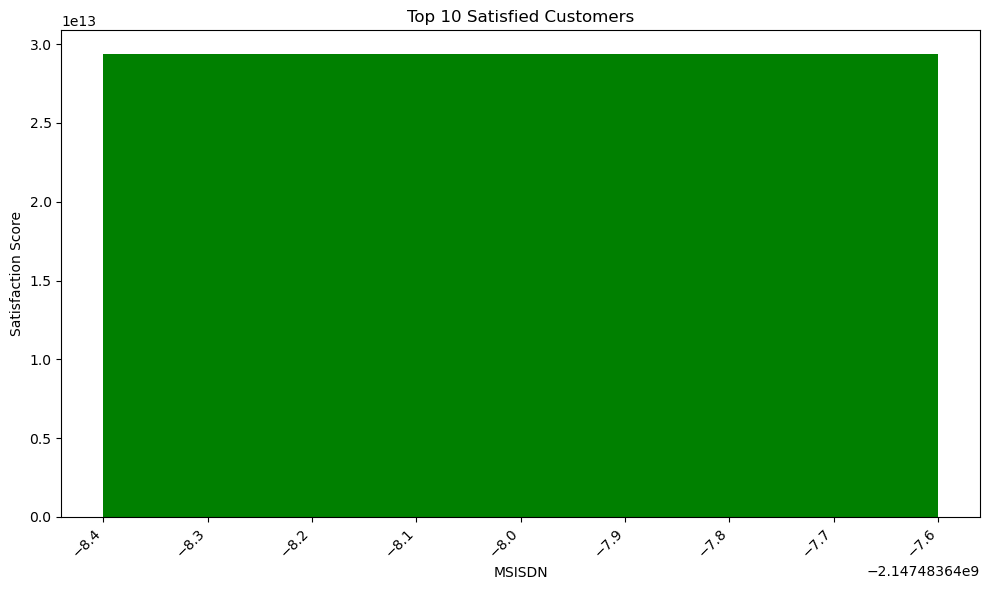

In [19]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_satisfied_customers['MSISDN'], top_satisfied_customers['satisfaction_score'], color='green')
plt.xlabel('MSISDN')
plt.ylabel('Satisfaction Score')
plt.title('Top 10 Satisfied Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Build a regression model of your choice to predict the satisfaction score of a customer. 


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = score_df[['engagement_score', 'Experience Score']]
y = score_df[['satisfaction_score']]


X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.30, random_state=42)


linear_reg = LinearRegression()

x = linear_reg.fit(X_train, y_train)
pred = linear_reg.predict(X)


#### Run a k-means (k=2) on the engagement & the experience score.

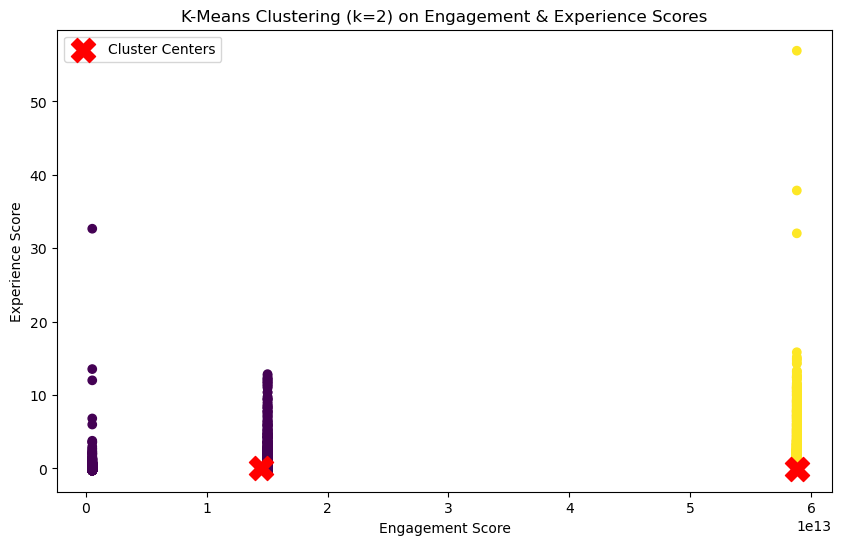

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Select the relevant columns for clustering
X = satisfaction_metrics[['engagement_score', 'Experience Score']]

# Run KMeans clustering with k=2
kmeans_2 = KMeans(n_clusters=2, random_state=42)
satisfaction_metrics['cluster_2'] = kmeans_2.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(satisfaction_metrics['engagement_score'], satisfaction_metrics['Experience Score'], c=satisfaction_metrics['cluster_2'], cmap='viridis')
plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Cluster Centers')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.title('K-Means Clustering (k=2) on Engagement & Experience Scores')
plt.legend()
plt.show()

#### Aggregate the average satisfaction & experience score per cluster. 

In [25]:
# Group by the cluster and calculate the average satisfaction and experience scores
cluster_aggregate = satisfaction_metrics.groupby('cluster_2')[['satisfaction_score', 'Experience Score']].mean()

# Display the aggregated results
print("Aggregate of Average Satisfaction and Experience Scores per Cluster:")
print(cluster_aggregate)

Aggregate of Average Satisfaction and Experience Scores per Cluster:
           satisfaction_score  Experience Score
cluster_2                                      
0                7.263196e+12          0.066698
1                2.940731e+13         -0.016973
